# K-Mean Clustring

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
from sklearn.datasets import make_blobs

In [20]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [21]:
X.shape

(1000, 2)

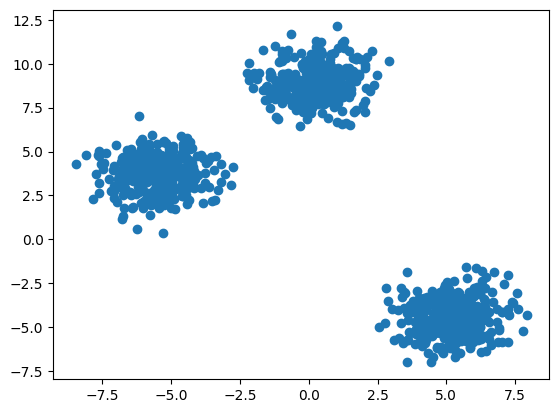

In [63]:
plt.scatter(X[:,0],X[:,1])

In [25]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test =train_test_split(
    X,y,test_size=0.30, random_state=42)

In [29]:
from sklearn.cluster import KMeans

In [38]:
##Manual Method
##elbow method To select k value

wcss=[]
for k in range(1,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    wcss.append(Kmeans.inertia_)

In [39]:
wcss

[36285.58841267135,
 8328.553214543635,
 1377.586284308013,
 1259.016825638918,
 1060.5924666955643,
 928.8940405636491,
 795.4497483940477,
 698.2874423829638,
 660.3704498115536,
 616.3853940378926]

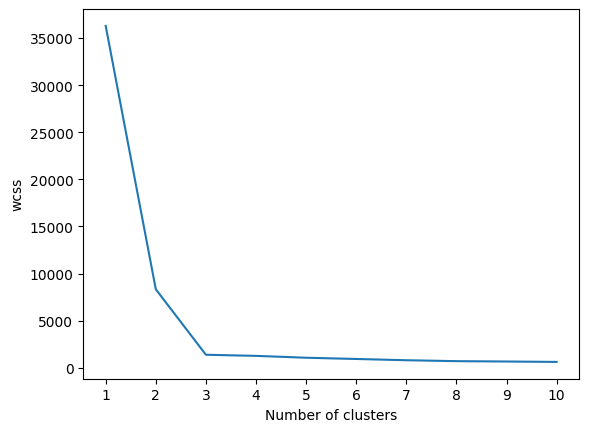

In [41]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("wcss")
plt.show()

In [42]:
##best value for k is 3

In [43]:
Kmeans=KMeans(n_clusters=3,init='k-means++')

In [45]:
y_labels=Kmeans.fit_predict(X_train)

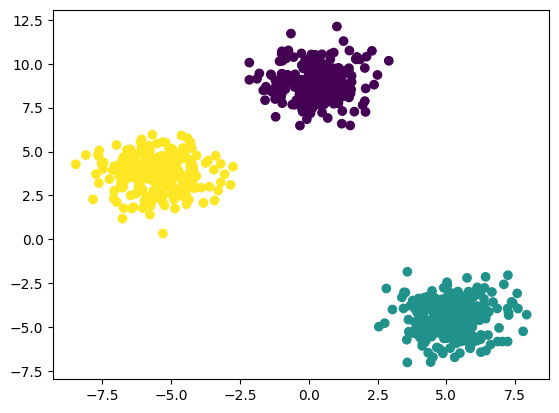

In [48]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

In [50]:
##for automatic finding k value use knee locator
!pip install kneed

In [52]:
from kneed import KneeLocator

In [57]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')
kl.elbow

3

In [59]:
##now for performation validation 
#we use silhoutte score
from sklearn.metrics import silhouette_score

In [60]:
silhouette_cofficients=[]
for k in range(2,11):
    Kmeans=KMeans(n_clusters=k,init='k-means++')
    Kmeans.fit(X_train)
    score=silhouette_score(X_train,Kmeans.labels_)
    silhouette_cofficients.append(score)
    

In [61]:
silhouette_cofficients

[0.7271977071483245,
 0.8068947097948808,
 0.651881467586487,
 0.47851345641645937,
 0.508302628532286,
 0.4983451839077176,
 0.3365375237194338,
 0.34561121687271795,
 0.33385481356469826]

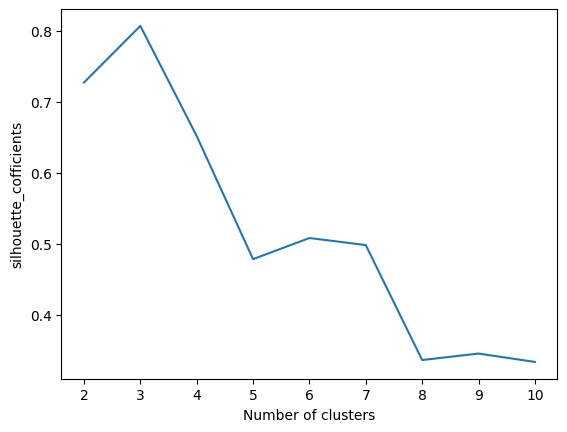

In [62]:
plt.plot(range(2,11),silhouette_cofficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette_cofficients")
plt.show()